## Initial EDA

load in the data and first look at our target variable


In [1]:
# standard and modeling imports

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import copy
#from Modules import *
sns.set()
%matplotlib inline
import imblearn
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score,  KFold
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
#df = pd.read_excel('Full_Datav6_zip_extract.xls', header=None)
#df = pd.read_excel('Full_Datav5.xlsx', header=0)
#df = pd.read_csv('Full_Datav5.csv', header=0)



#y = df['Y']
#y = df.Y

#df.head()

#df = pd.read_excel('Full_Datav4.xls', header=0)
#df = pd.read_excel('Full_Datav6_zip_extract.xls', header=None)
df = pd.read_excel('Full_Datav6_zip_extractt.xls', header=0, skiprows=0, names=['Households SNAP' , 'Estimated Individuals SNAP' , 'SNAP percent Population' , 
                                                                                'SNAP Per Capita Benefit or TAM' , 'Total Citizen Educated in US' , 
                                                                                'Citizen Less than High School Education' , 'Citizen High School  Graduate' , 
                                                                                'Citizen Some College Education' , 'Citizen College Degree'  , 'Citizen Graduate or Professional Degree',
                                                                                'Total Citizen Income' , 'Citizen No Income' , 'Citizen Income 1-9999' , 'Citizen Income 10000-14999' , 
                                                                                'Citizen Income 15000-24999' , 'Citizen Income 25000-34999' , 'Citizen Income 35000-49999' , 
                                                                                'Citizen Income 50000-64999' , 'Citizen Income 65000-74999' , 'Citizen Income 75000 plus'  , 
                                                                                'Total Population' , 'One Race Population' , 'White Race' , 'Black Race' , 'Native American Race' , 
                                                                                'Asian Race' , 'Pacific Islander Race' , 'Other Race Alone' , 'Hispanic or Latino' ,
                                                                                'Median Age', 'Male Median Age' , 'Female Median Age', 'Total Households' , 'Average Household Size' , 
                                                                                'Total Families' , 'state code' , 'zip code'])


#df = pd.read_excel('Full_Datav6_zip_extractt.xls', skiprows=1, names=['1'])
                                                                #      ,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37'])

#df = pd.read_csv('Full_Datav6_zip_extracttf.csv')

#df = pd.read_excel('Full_Datav4.xls', header=None)


#df.columns = df.iloc[0,:]

#df.rename(index=str, columns={"SNAP Per Capita Benefit or TAM": "Y"}, inplace=True)

#df.drop('ID', inplace=True, axis=0)

#y = df["Y"]
#y = df.Y

df.head()

,Households SNAP,Estimated Individuals SNAP,SNAP percent Population,SNAP Per Capita Benefit or TAM,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,...,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families,state code,zip code
0,765,1705.95,0.101732,2564042.85,13358,1167,3779,4397,2397,1618,...,229,16209,45.5,43.0,47.7,7215,2.23,3098,25,1001
1,749,1827.56,0.062913,2746822.68,13787,633,1684,2229,3405,5836,...,1217,26766,24.0,23.6,24.8,9910,2.44,4050,25,1002
2,8,25.60,0.002468,38476.80,136,26,13,68,14,15,...,372,9843,20.2,20.2,20.1,5,3.20,10,25,1003
3,147,383.67,0.075540,576656.01,3498,123,1270,1023,547,535,...,71,4990,41.0,40.0,41.7,1904,2.61,1284,25,1005
4,450,1179.00,0.080483,1772037.00,10062,644,2407,2518,2423,2070,...,260,14264,41.1,40.0,42.0,5595,2.62,3691,25,1007


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32936 entries, 0 to 32935
Data columns (total 37 columns):
Households SNAP                            32936 non-null int64
Estimated Individuals SNAP                 32936 non-null float64
SNAP percent Population                    32936 non-null float64
SNAP Per Capita Benefit or TAM             32936 non-null float64
Total Citizen Educated in US               32936 non-null int64
Citizen Less than High School Education    32936 non-null int64
Citizen High School  Graduate              32936 non-null int64
Citizen Some College Education             32936 non-null int64
Citizen College Degree                     32936 non-null int64
Citizen Graduate or Professional Degree    32936 non-null int64
Total Citizen Income                       32936 non-null int64
Citizen No Income                          32936 non-null int64
Citizen Income 1-9999                      32936 non-null int64
Citizen Income 10000-14999                 32936 non-

In [4]:
# building features and re-naming target data Y

df.rename(index=str, columns={"SNAP Per Capita Benefit or TAM": "Y"}, inplace=True)
#df.drop('NAME', axis=1, inplace=True )
#df = df.astype('float32')

df.head()

,Households SNAP,Estimated Individuals SNAP,SNAP percent Population,Y,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,...,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families,state code,zip code
0,765,1705.95,0.101732,2564042.85,13358,1167,3779,4397,2397,1618,...,229,16209,45.5,43.0,47.7,7215,2.23,3098,25,1001
1,749,1827.56,0.062913,2746822.68,13787,633,1684,2229,3405,5836,...,1217,26766,24.0,23.6,24.8,9910,2.44,4050,25,1002
2,8,25.60,0.002468,38476.80,136,26,13,68,14,15,...,372,9843,20.2,20.2,20.1,5,3.20,10,25,1003
3,147,383.67,0.075540,576656.01,3498,123,1270,1023,547,535,...,71,4990,41.0,40.0,41.7,1904,2.61,1284,25,1005
4,450,1179.00,0.080483,1772037.00,10062,644,2407,2518,2423,2070,...,260,14264,41.1,40.0,42.0,5595,2.62,3691,25,1007


In [5]:
#find out missing values
names = []
value = []
for col in df.columns:
    names.append(col)
    value.append(df[col].isnull().sum())
    print("number of missing values: ", names[-1], value[-1],"""     """, "Percentage of missing values:", names[-1], round((value[-1]/32936)*100))  

number of missing values:  Households SNAP 0       Percentage of missing values: Households SNAP 0.0
number of missing values:  Estimated Individuals SNAP 0       Percentage of missing values: Estimated Individuals SNAP 0.0
number of missing values:  SNAP percent Population 0       Percentage of missing values: SNAP percent Population 0.0
number of missing values:  Y 0       Percentage of missing values: Y 0.0
number of missing values:  Total Citizen Educated in US 0       Percentage of missing values: Total Citizen Educated in US 0.0
number of missing values:  Citizen Less than High School Education 0       Percentage of missing values: Citizen Less than High School Education 0.0
number of missing values:  Citizen High School  Graduate 0       Percentage of missing values: Citizen High School  Graduate 0.0
number of missing values:  Citizen Some College Education 0       Percentage of missing values: Citizen Some College Education 0.0
number of missing values:  Citizen College Degree 

In [6]:
#split my data
#df = df.astype('float32')
X = df.drop(columns = 'Y')
#y = df['Y']
y = df.Y

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32936 entries, 0 to 32935
Data columns (total 37 columns):
Households SNAP                            32936 non-null int64
Estimated Individuals SNAP                 32936 non-null float64
SNAP percent Population                    32936 non-null float64
Y                                          32936 non-null float64
Total Citizen Educated in US               32936 non-null int64
Citizen Less than High School Education    32936 non-null int64
Citizen High School  Graduate              32936 non-null int64
Citizen Some College Education             32936 non-null int64
Citizen College Degree                     32936 non-null int64
Citizen Graduate or Professional Degree    32936 non-null int64
Total Citizen Income                       32936 non-null int64
Citizen No Income                          32936 non-null int64
Citizen Income 1-9999                      32936 non-null int64
Citizen Income 10000-14999                 32936 non-null 

Text(0.5, 1, 'Heatmap Correlation Matrix')

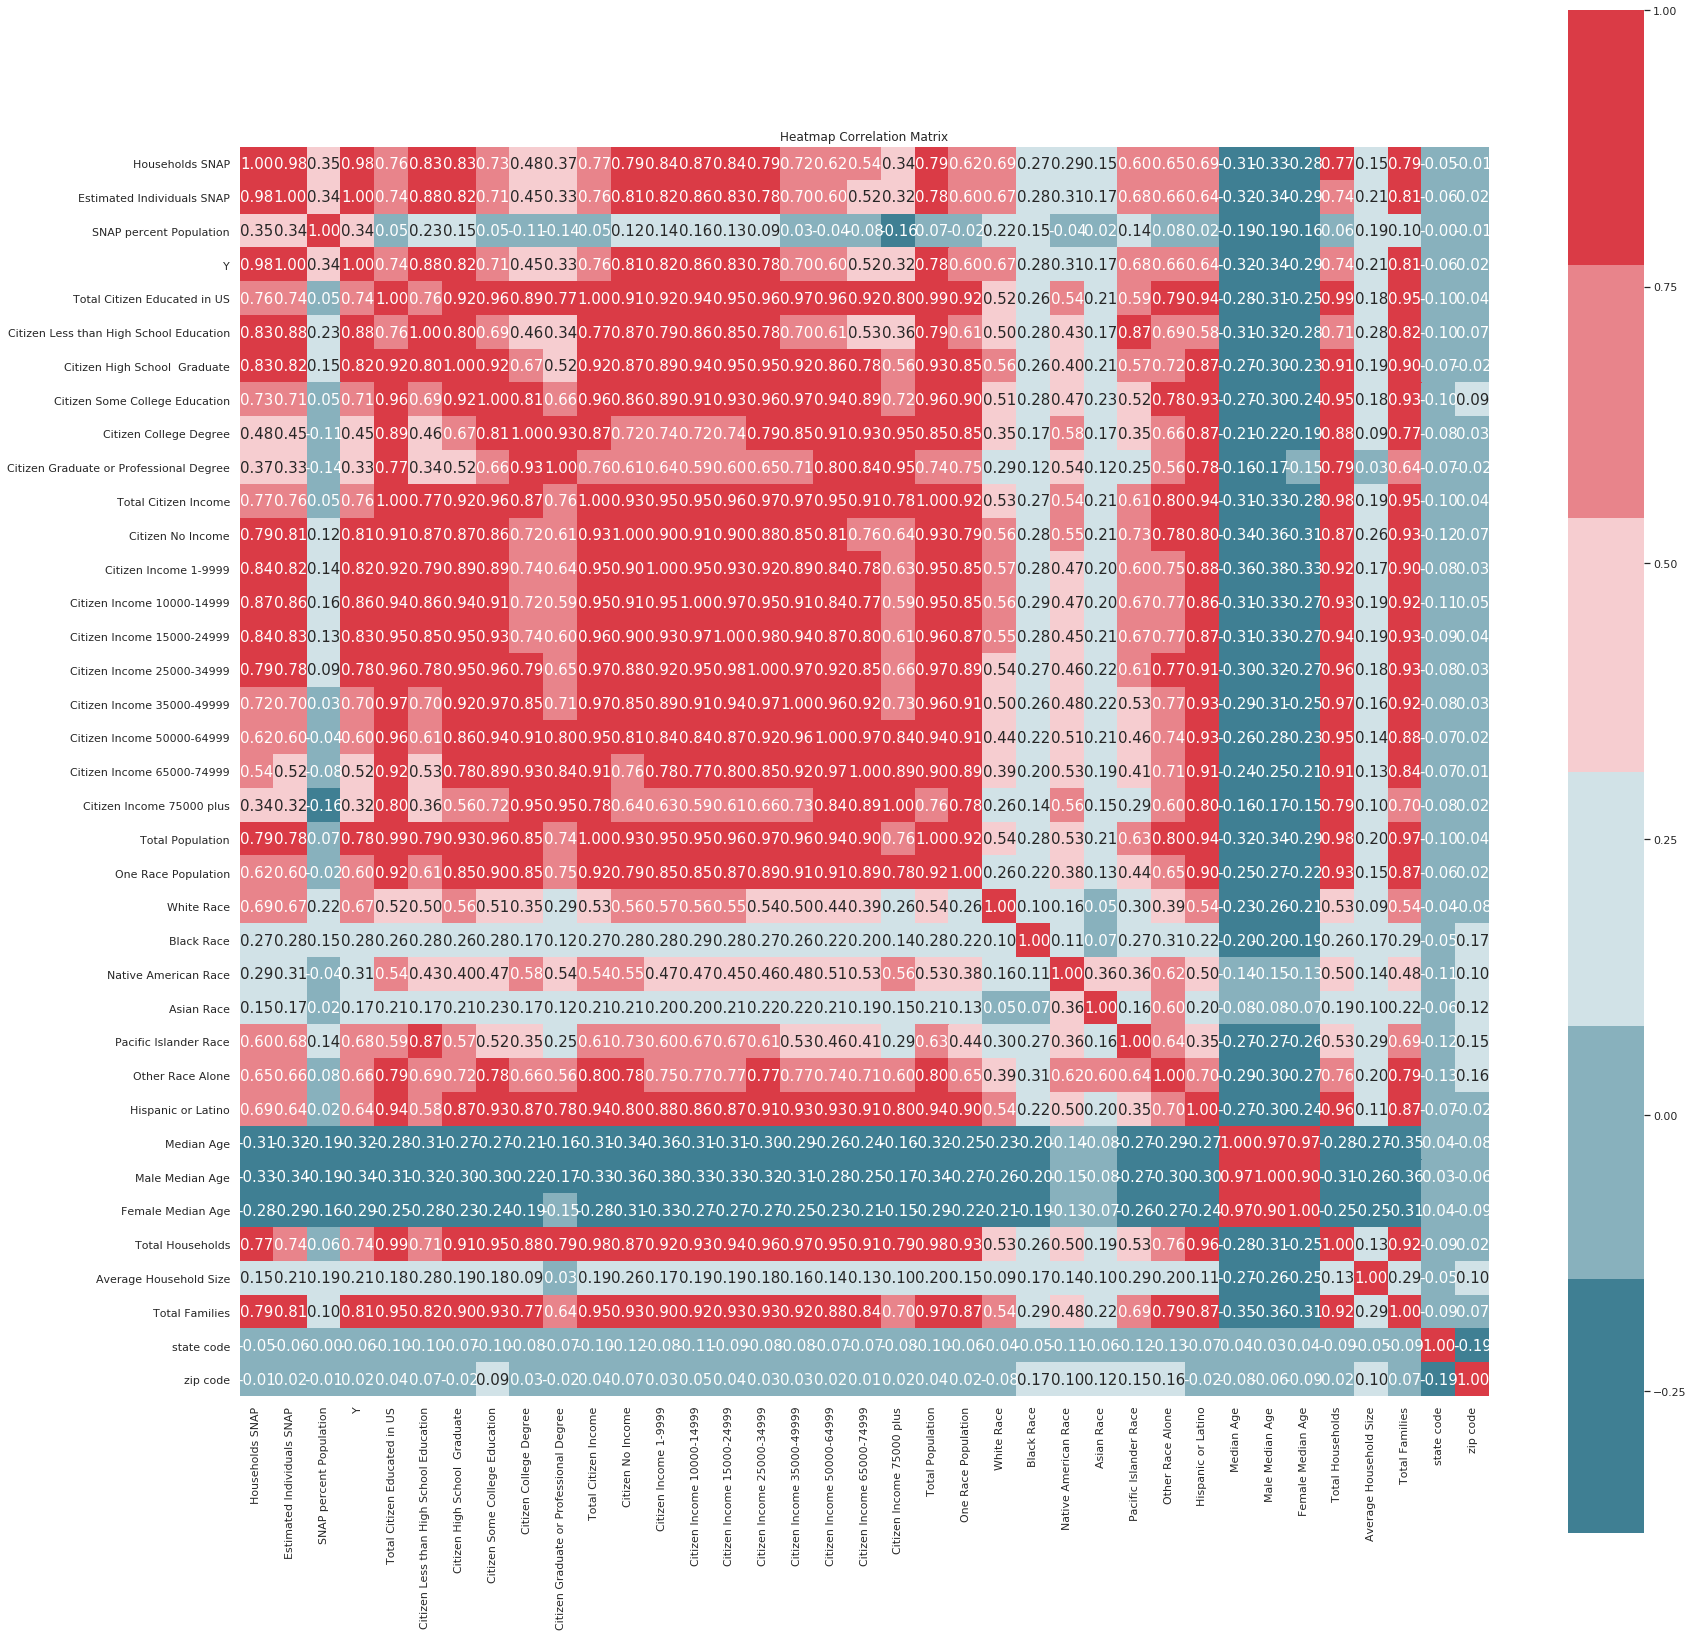

In [7]:
corr=df.corr()
corr = (corr)
plt.figure(figsize=(28,28))
sns.heatmap(corr, cbar = True, square = True,  cmap = sns.diverging_palette(220, 10), annot=True, fmt= '.2f',annot_kws={'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title('Heatmap Correlation Matrix')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15882b1588>,
      dtype=object)

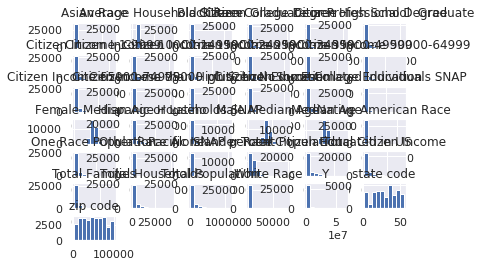

In [8]:
df.hist()

## Split the data for regressions

In [23]:
#split my data
#remove elements used to calculate Y in order to render 
X = df.drop(columns = ['Y', 'Households SNAP', 'Estimated Individuals SNAP','Average Household Size'])
y = df['Y']


In [24]:
#split into training and testing 75% Train and 25% test

from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2019, test_size = .25)

In [40]:
# build my classifier

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
#from sklearn.linear_model import LinearRegression, LinearRegressionCV
#clf = LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

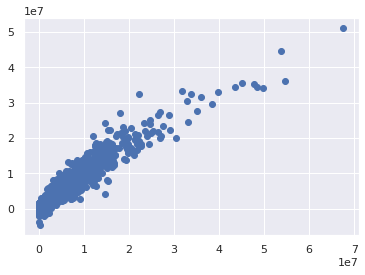

In [41]:
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)

In [44]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

#convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. 

data_dmatrix = xgb.DMatrix(data=X,label=y)

#instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [46]:
#Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods.
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

#Compute the rmse by invoking the mean_sqaured_error function from sklearn's metrics module.
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 527809.479620


In [47]:
# create a hyper-parameter dictionary params which holds all the hyper-parameters and their values as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary 
#use num_boost_rounds instead.
# build a 3-fold cross validation model by invoking XGBoost's cv() method and store the results in a cv_results DataFrame.

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=2019)

In [48]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3.947484e+06,8405.776180,3.956578e+06,16922.434998
1,3.601110e+06,19691.429312,3.614123e+06,11861.600553
2,3.310978e+06,20484.282130,3.332037e+06,17092.869844
3,3.034040e+06,36793.948054,3.061554e+06,23445.708174
4,2.783338e+06,39121.618225,2.820256e+06,16699.557225


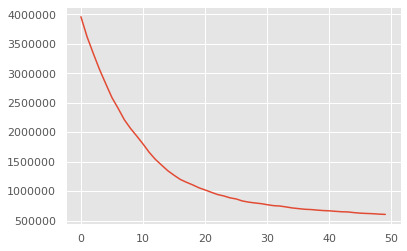

In [49]:
#We can visualize how RMSE changed over training. You should observe a downward curve below.

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cv_results['test-rmse-mean'].plot()

In [50]:
#Extract and print the final boosting round metric.

print((cv_results["test-rmse-mean"]).tail(1))

49    605459.9375
Name: test-rmse-mean, dtype: float64


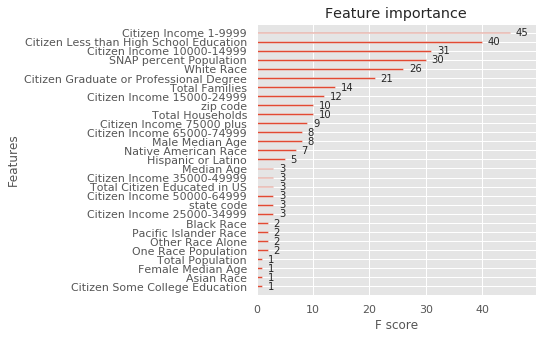

In [52]:
#counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features 
#ordered according to how many times they appear using XGBoost plot_importance() function 

plt.rcParams['figure.figsize'] = [5, 5]
xgb.plot_importance(xg_reg)

plt.show()

ValueError: Unable to parse node: 0:[Citizen

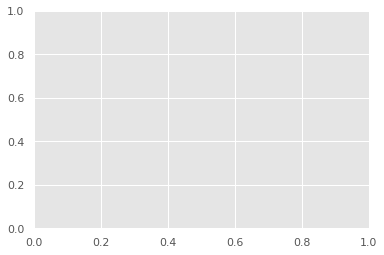

In [51]:
#visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. XGBoost has a plot_tree() function that makes this type 
#of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot 
#using the num_trees argument.

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 30]
plt.show()

In [29]:
model = LinearRegression().fit(X,y)
print(model.coef_)
#print(X.coef_)

[ 2.22578006e+06  4.42290720e+02  5.26988854e+02  2.50185585e+02
 -3.61012753e+02  2.26683882e+01  3.46064498e+00 -3.79908851e+02
  7.43071305e+01  1.08698885e+03  3.97485461e+02 -8.30656841e+01
 -3.97812928e+02 -5.81932040e+02 -3.34122288e+02  1.58071856e+01
 -5.57564542e+02 -1.98730596e+02 -1.16913255e+02  5.72551298e+01
 -5.85694952e+01 -1.57276599e+02 -6.64209430e+02 -2.58492620e+02
  9.99475673e+02 -1.05739310e+02  1.04966573e+04  8.24511426e+03
 -1.66147327e+04  8.79339873e+02  9.52049322e+02  3.34294982e+03
 -2.37679886e+00]


In [14]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

ImportError: cannot import name 'factorial'

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

results = ols(y,X).fit()
results.summary()
#model.summary()

In [ ]:
#from imblearn.over_sampling import SMOTE

#create my oversampled data to train on

oversampler = SMOTE(random_state = 2019)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
#Put the oversampled data back into a dataframe
X_train_oversampled = pd.DataFrame(X_train_oversampled, columns = X_train.columns)
y_train_oversampled = pd.Series(y_train_oversampled)

In [ ]:
# build my classifier
from sklearn.linear_model import LinearRegression, LinearRegressionCV
clf = LinearRegression()

In [ ]:
# build my classifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
clf = LogisticRegression()

In [ ]:
#Fit to the oversampled data; this will train the classifier on the oversampled data
clf.fit(X_train_oversampled, y_train_oversampled)

In [ ]:
#Use 5-fold cross validation to see how well the classfier you built is doing on test data.

kfold = KFold(n_splits=5, random_state=2019)
results = cross_val_score(clf, X_test, y_test, cv=kfold, scoring = 'f1')

print(f"5-fold cross-validation results: {np.mean(results)}")

In [ ]:
#tweak my classifer

clf2 = LogisticRegression(C = .5)

clf2.fit(X_train_oversampled, y_train_oversampled)

results = cross_val_score(clf2, X_test, y_test, cv=kfold, scoring = 'f1')

print(f"5-fold cross-validation results: {np.mean(results)}")

In [ ]:
clf_cv = LogisticRegressionCV(n_jobs = -1)

clf_cv.fit(X_train_oversampled, y_train_oversampled)

results = cross_val_score(clf, X_test, y_test, cv=kfold, scoring = 'f1')

print(f"5-fold cross-validation results: {np.mean(results)}")

In [ ]:
#create histograms for each variable
#we'll group some of the columns together to make plotting easier

df_group1 = df.iloc[:, 0:5]
df_group1.plot(kind='density', subplots=True, layout=(3,2), sharex=False)
plt.show()


#df.hist()

#plt.show()

Some notes: LIMIT_BAL and AGE are approaching a gaussian shape, but both are somewhat rightly skewed. Both sex and Marriage are bimodal (obviously), and Education is trimodal, with the three most common values of 1, 2, 3, and a tiny amount of 4, and 5. Besides LIMIT_BAL, nothing particular about these features. 

Next, we'll look at the Payment history. Since the values in these features are categorical in nature, we'll use bar plots.


In [ ]:
#create group
df_pay_hist = df.iloc[:,5:11]

fig, ax = plt.subplots(figsize = (10,8), sharex=True)


plt.subplot(3,2,1)
df['PAY_0'].value_counts().plot(kind='bar')

plt.subplot(3,2,2)
df['PAY_2'].value_counts().plot(kind='bar')

plt.subplot(3,2,3)
df['PAY_3'].value_counts().plot(kind='bar')

plt.subplot(3,2,4)
df['PAY_4'].value_counts().plot(kind='bar')

plt.subplot(3,2,5)
df['PAY_5'].value_counts().plot(kind='bar')

plt.subplot(3,2,6)
df['PAY_6'].value_counts().plot(kind='bar')





Some notes: all the plots are pretty much the same. Values of 0 are the most common by a large amount, i.e. another instance of some class inbalance. Will have to handle as well. 

Next, look at the Bill amounts.

In [ ]:
df['BILL_AMT1'].plot(kind='hist', )

In [ ]:
#create group
ax, fig = plt.subplots(figsize = (10,8))
bill_amts = df.iloc[:, 11:17]

plt.subplot(3,2,1)
bill_amts['BILL_AMT1'].hist(bins=25)

plt.subplot(3,2,2)
bill_amts['BILL_AMT2'].hist(bins=25)

plt.subplot(3,2,3)
bill_amts['BILL_AMT3'].hist(bins=25)

plt.subplot(3,2,4)
bill_amts['BILL_AMT4'].hist(bins=25)

plt.subplot(3,2,5)
bill_amts['BILL_AMT5'].hist(bins=25)

plt.subplot(3,2,6)
bill_amts['BILL_AMT6'].hist(bins=25)




In [ ]:
# ds1 = pd.Series([PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6])
# ds2 = pd.Series([BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6])
# Outstanding_Bal = ds2 - ds1

# print(Outstanding_Bal)

In [ ]:
# Load libraries

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# divided columns into two types of variables - target variable (y) and feature variables (X).
X = df.drop(columns="Y")
y = df.Y

In [ ]:
X

In [ ]:
# Split dataset into training set and test set
# 70% training and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) 


### Building Decision Tree Model
Let's create a Decision Tree Model using `DecisionTreeClassifier` provided in `Scikit-learn`.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model
Estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values (y_test) and predicted values (y_pred).

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# created new column OUTSTANDING_BAL for each month

df["OUTSTANDING_BAL1"] = (df.BILL_AMT1 - df.PAY_AMT1)
df["OUTSTANDING_BAL2"] = (df.BILL_AMT2 - df.PAY_AMT2)
df["OUTSTANDING_BAL3"] = (df.BILL_AMT3 - df.PAY_AMT3)
df["OUTSTANDING_BAL4"] = (df.BILL_AMT4 - df.PAY_AMT4)
df["OUTSTANDING_BAL5"] = (df.BILL_AMT5 - df.PAY_AMT5)
df["OUTSTANDING_BAL6"] = (df.BILL_AMT6 - df.PAY_AMT6)

df.head(5)

In [ ]:
# created new column %_LIMIT_BAL for each month

df["%_LIMIT_BAL1"] = (df.OUTSTANDING_BAL1 / df.LIMIT_BAL)
df["%_LIMIT_BAL2"] = (df.OUTSTANDING_BAL2 / df.LIMIT_BAL)
df["%_LIMIT_BAL3"] = (df.OUTSTANDING_BAL3 / df.LIMIT_BAL)
df["%_LIMIT_BAL4"] = (df.OUTSTANDING_BAL4 / df.LIMIT_BAL)
df["%_LIMIT_BAL5"] = (df.OUTSTANDING_BAL5 / df.LIMIT_BAL)
df["%_LIMIT_BAL6"] = (df.OUTSTANDING_BAL6 / df.LIMIT_BAL)


df.head(5)

In [ ]:
df.info()

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns, class_names=['0','1']) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('credit_card.png')
Image(graph.create_png())

In [ ]:
# divided columns into two types of variables - target variable (y) and feature variables (X).
X = df.drop(columns=["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6", "Y"])
y = df.Y

In [ ]:
X.columns

In [ ]:
# Split dataset into training set and test set
# 70% training and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) 


### Building Decision Tree Model
Let's create a Decision Tree Model using `DecisionTreeClassifier` provided in `Scikit-learn`.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model
Estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values (y_test) and predicted values (y_pred).

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# divided columns into two types of variables - target variable (y) and feature variables (X).
X = df.drop(columns=['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'OUTSTANDING_BAL1',
       'OUTSTANDING_BAL2', 'OUTSTANDING_BAL3', 'OUTSTANDING_BAL4',
       'OUTSTANDING_BAL5', 'OUTSTANDING_BAL6', "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6", "Y"])
y = df.Y

In [ ]:
X.columns

In [ ]:
# Split dataset into training set and test set
# 70% training and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) 


### Building Decision Tree Model
Let's create a Decision Tree Model using `DecisionTreeClassifier` provided in `Scikit-learn`.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model
Estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values (y_test) and predicted values (y_pred).

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## Results
Creating calculated columns for Increasing outstanding balance per month column and Outstanding Bal had no meaningful effect and removing the repayment status, outstanding balance, bill amount lowered the accuracy by about a half percent
